# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
# API dependencies
import requests
import json

# Data manipulation dependencies
import pandas as pd
import numpy as np

# Datetime dependencies
import time

# Plotting dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas  # maps dependency

# Linear regression dependencies
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Turn off warnings
import warnings
warnings.filterwarnings('ignore')

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"
params = {
    "appid": weather_api_key,
    "q": "city"
}

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url 
    params["q"] = city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
   
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url, params=params)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = requests.get(city_url, params=params).json()["coord"]["lat"]
        city_lng = requests.get(city_url, params=params).json()["coord"]["lon"]
        city_max_temp = requests.get(city_url, params=params).json()["main"]["temp_max"]
        city_humidity = requests.get(city_url, params=params).json()["main"]["humidity"]
        city_clouds = requests.get(city_url, params=params).json()["clouds"]["all"]
        city_wind = requests.get(city_url, params=params).json()["wind"]["speed"]
        city_country = requests.get(city_url, params=params).json()["sys"]["country"]
        city_date = requests.get(city_url, params=params).json()["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # Pause in the code to avoid an API timeout and to be kind to Open Weather Map API
    time.sleep(2)
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sandnessjoen
Processing Record 2 of Set 1 | sirre
Processing Record 3 of Set 1 | sur
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | gadzhiyevo
Processing Record 7 of Set 1 | isafjordur
Processing Record 8 of Set 1 | bilibino
Processing Record 9 of Set 1 | kondoa
Processing Record 10 of Set 1 | haiku-pauwela
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | hawaiian paradise park
Processing Record 13 of Set 1 | taiohae
City not found. Skipping...
Processing Record 14 of Set 1 | brookings
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | west bay
Processing Record 18 of Set 1 | valparaiso
Processing Record 19 of Set 1 | remire-montjoly
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Set 1 | puerto ayora
Processing 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sandnessjoen,66.0217,12.6316,288.44,55,100,4.92,NO,1716669397
1,sirre,8.3167,39.4833,292.71,62,18,3.08,ET,1716669560
2,sur,22.5667,59.5289,304.01,43,51,4.69,OM,1716669361
3,grytviken,-54.2811,-36.5092,265.11,74,91,4.35,GS,1716669582
4,punta arenas,-53.1500,-70.9167,277.21,87,40,3.60,CL,1716669592


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sandnessjoen,66.0217,12.6316,288.44,55,100,4.92,NO,1716669397
1,sirre,8.3167,39.4833,292.71,62,18,3.08,ET,1716669560
2,sur,22.5667,59.5289,304.01,43,51,4.69,OM,1716669361
3,grytviken,-54.2811,-36.5092,265.11,74,91,4.35,GS,1716669582
4,punta arenas,-53.1500,-70.9167,277.21,87,40,3.60,CL,1716669592


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

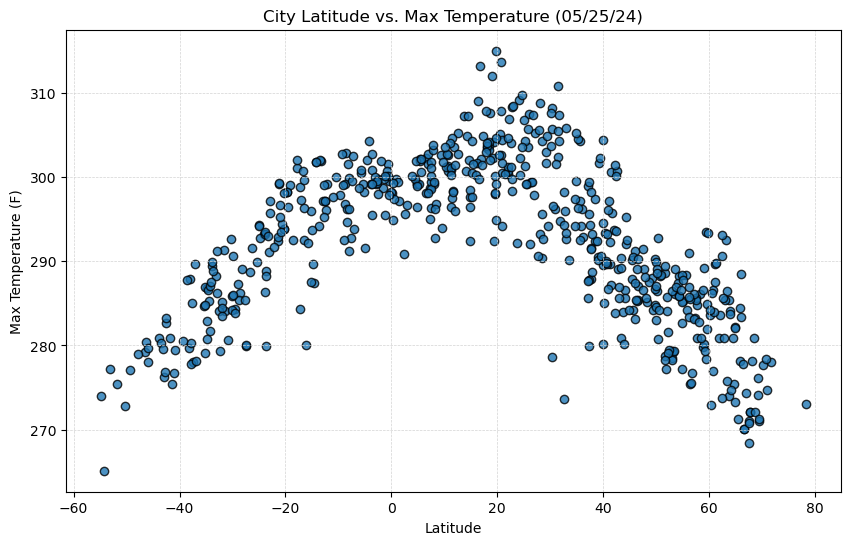

In [8]:
# Build scatter plot for latitude vs. temperature
# 1. Get the data
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]

# Incorporate the other graph properties
# 2. Make the canvas
plt.figure(figsize=(10,6))

# 3. Make the scatter plot
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(linestyle='--', linewidth=0.5, color="lightgrey")

# Save the figure
# 4. Save/Show the plot
plt.savefig("output_data/Fig1.png")

# 5. Show the plot
plt.show()

#### Latitude Vs. Humidity

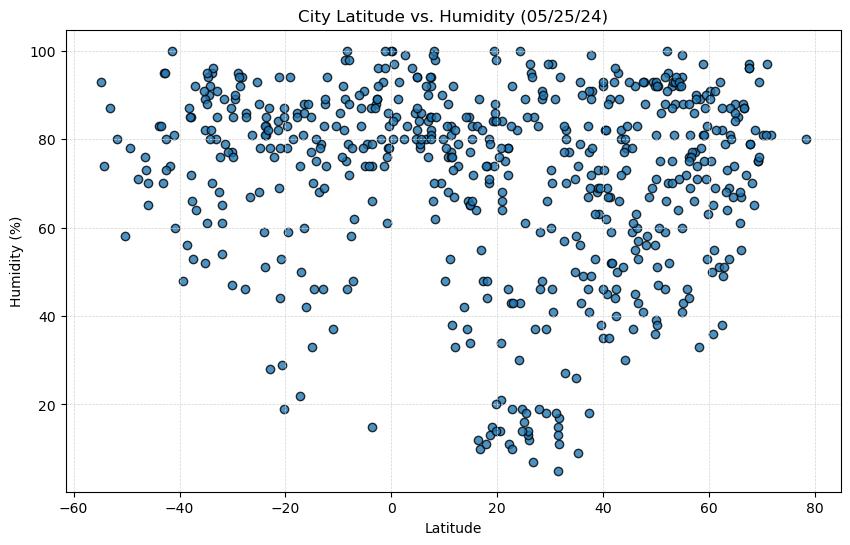

In [9]:
# Build the scatter plots for latitude vs. humidity
# 1. Get the data
lats = city_data_df["Lat"]
humidity = city_data_df["Humidity"]

# Incorporate the other graph properties
# 2. Make the canvas
plt.figure(figsize=(10,6))

# 3. Make the scatter plot
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(linestyle='--', linewidth=0.5, color="lightgrey")

# Save the figure
# 4. Save/Show the plot
plt.savefig("output_data/Fig2.png")

# 5. Show the plot
plt.show()

#### Latitude Vs. Cloudiness

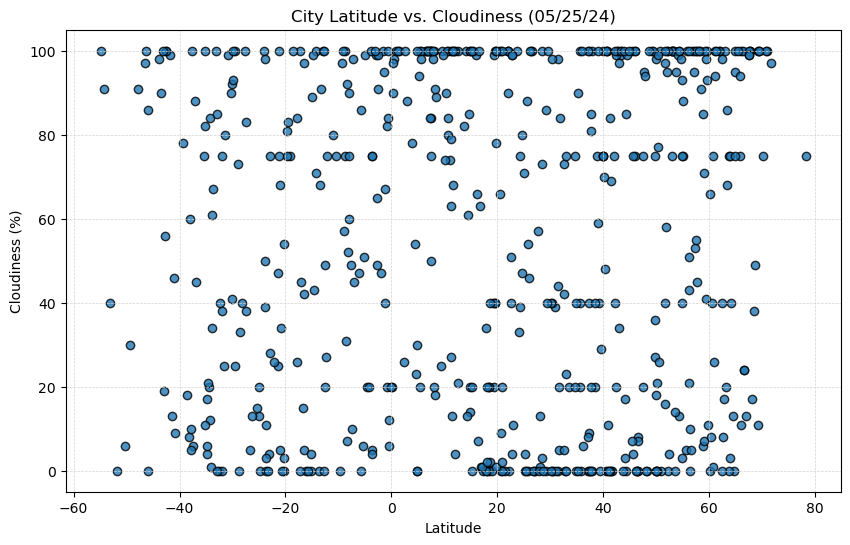

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# 1. Get the data
lats = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]

# Incorporate the other graph properties
# 2. Make the canvas
plt.figure(figsize=(10,6))

# 3. Make the scatter plot
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(linestyle='--', linewidth=0.5, color="lightgrey")


# Save the figure
# 4. Save/Show the plot
plt.savefig("output_data/Fig3.png")

# 5. Show the plot
plt.show()

#### Latitude vs. Wind Speed Plot

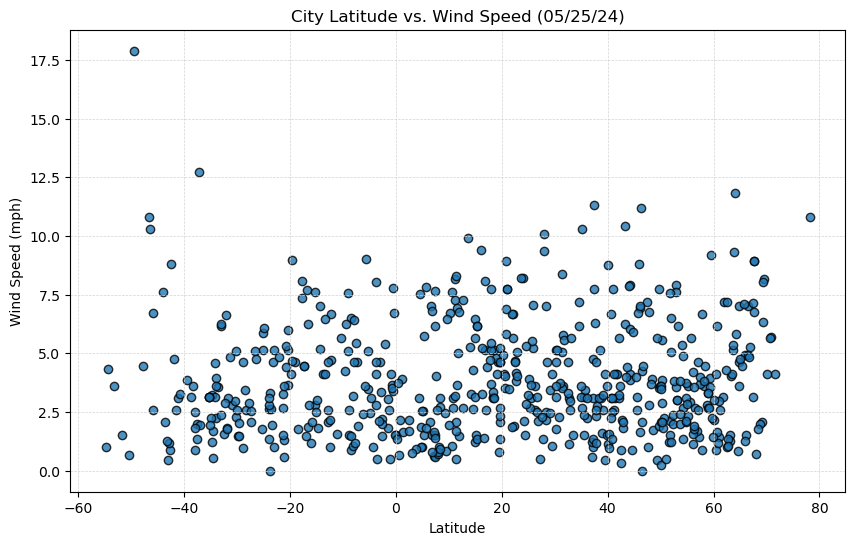

In [11]:
# Build the scatter plots for latitude vs. wind speed
# 1. Get the data
lats = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]

# Incorporate the other graph properties
# 2. Make the canvas
plt.figure(figsize=(10,6))

# 3. Make the scatter plot
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(linestyle='--', linewidth=0.5, color="lightgrey")

# Save the figure
# 4. Save/Show the plot
plt.savefig("output_data/Fig4.png")

# 5. Show the plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, ylabel, text_coordinates):
    
    # 1. Get the data
    # Run regression on hemisphere weather data
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # 2. Make the canvas
    plt.figure(figsize=(10,6))

    # 3. Make the scatter plot
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title, fontsize=16, fontweight='bold', color='black')
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)

    print(f"The r-value is: {rvalue}")

    # 4. Save/Show the plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
mask = city_data_df["Lat"] >= 0
northern_hemi_df = city_data_df.loc[mask]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sandnessjoen,66.0217,12.6316,288.44,55,100,4.92,NO,1716669397
1,sirre,8.3167,39.4833,292.71,62,18,3.08,ET,1716669560
2,sur,22.5667,59.5289,304.01,43,51,4.69,OM,1716669361
5,gadzhiyevo,69.2551,33.3362,276.14,75,100,6.35,RU,1716669603
6,isafjordur,66.0755,-23.1240,283.35,67,11,1.51,IS,1716669613


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
mask = city_data_df["Lat"] < 0
southern_hemi_df = city_data_df.loc[mask]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,grytviken,-54.2811,-36.5092,265.11,74,91,4.35,GS,1716669582
4,punta arenas,-53.1500,-70.9167,277.21,87,40,3.60,CL,1716669592
8,kondoa,-4.9000,35.7833,291.59,74,99,2.45,TZ,1716669634
13,adamstown,-25.0660,-130.1015,294.31,68,13,5.85,PN,1716669690
14,port-aux-francais,-49.3500,70.2167,277.11,78,30,17.89,TF,1716669700


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8000553099188987


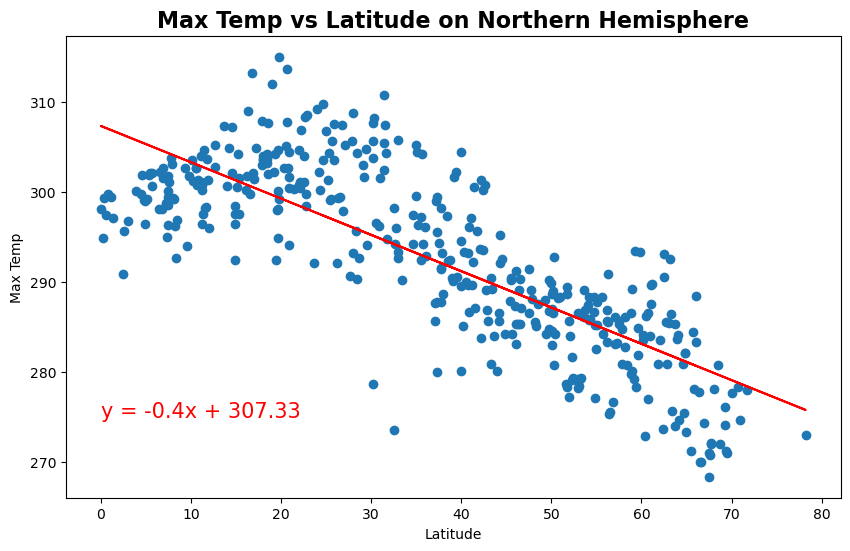

In [35]:
# Linear regression on Northern Hemisphere
# 1. Get the data
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# 2. Call the function to create the linear regression
plot_linear_regression(x_values, y_values, "Max Temp vs Latitude on Northern Hemisphere", "Max Temp", (0,275))

The r-value is: 0.8725959168767118


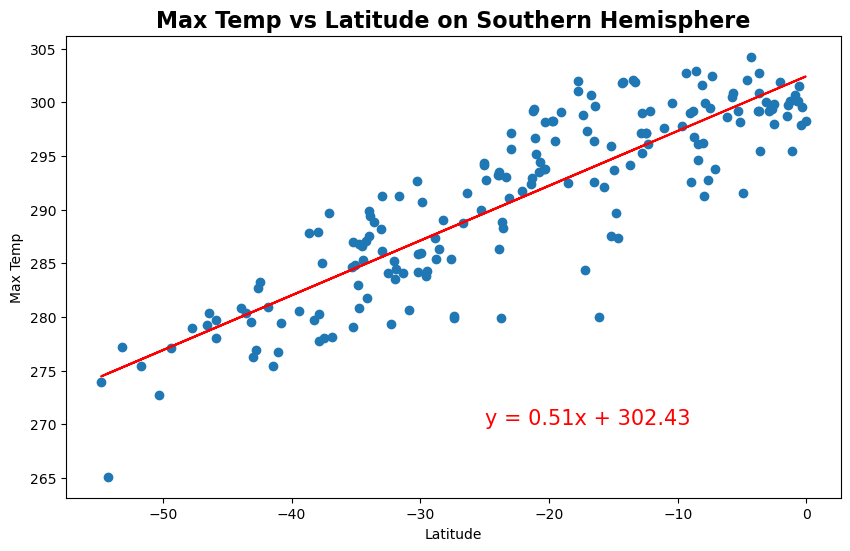

In [36]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Max Temp vs Latitude on Southern Hemisphere", "Max Temp",(-25,270))

**Discussion about the linear relationship:** The relationship between Temperature and Latitude is logical as we anticipate the temperature to increase the nearer the location is to the equator line. On the northern hemisphere, the relationship is negative with a strong correlation coefficient of -0.80. On the southern hemisphere, the relationship is positive with a strong correlation coefficient of 0.87.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05812794916611401


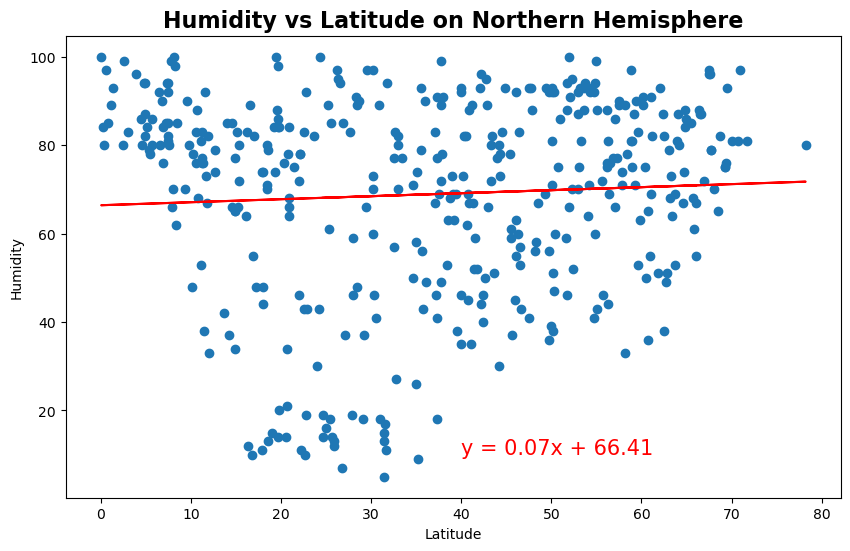

In [37]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Humidity vs Latitude on Northern Hemisphere", "Humidity",(40,10))

The r-value is: 0.00858442810677269


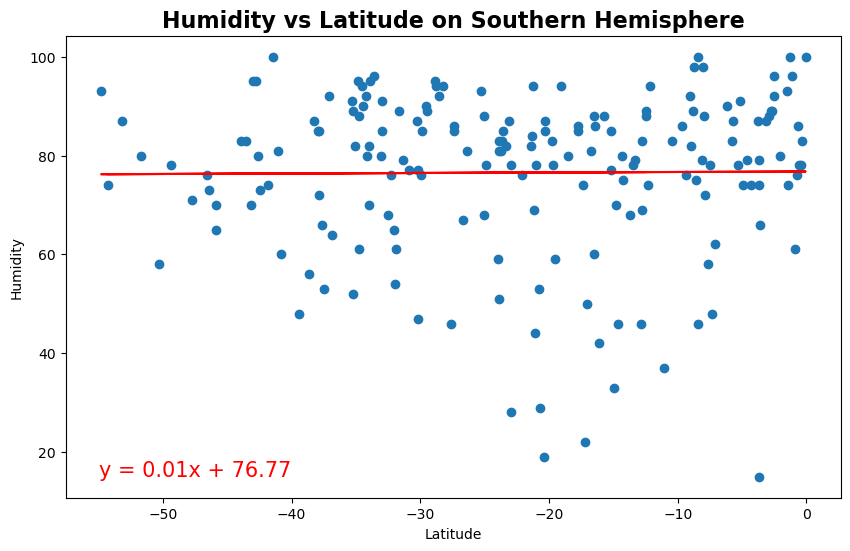

In [38]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Humidity vs Latitude on Southern Hemisphere", "Humidity",(-55,15))

**Discussion about the linear relationship:** Data shows that there is no correlation between humidity and latitude. The correlation coefficient for northern hemisphere is 0.06 and for the southern hemisphere is 0.00. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.009837846903013439


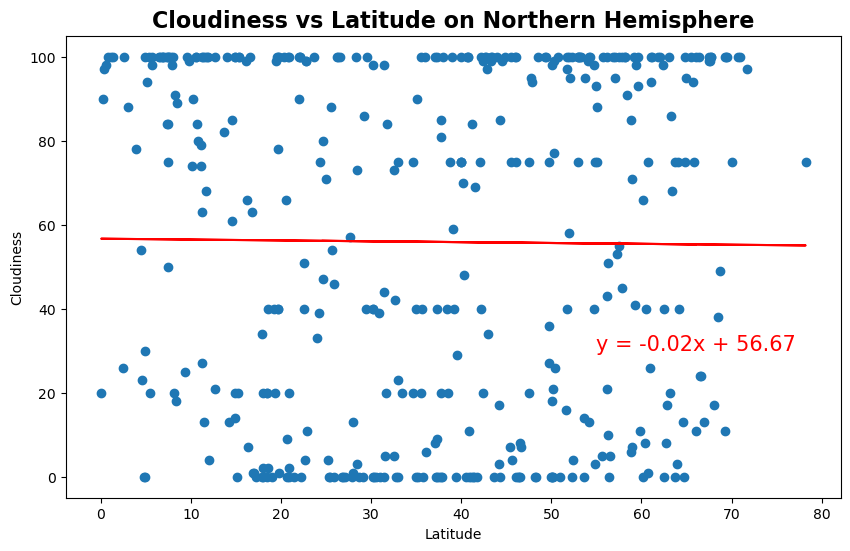

In [39]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Cloudiness vs Latitude on Northern Hemisphere", "Cloudiness",(55,30))

The r-value is: 0.04297653196463023


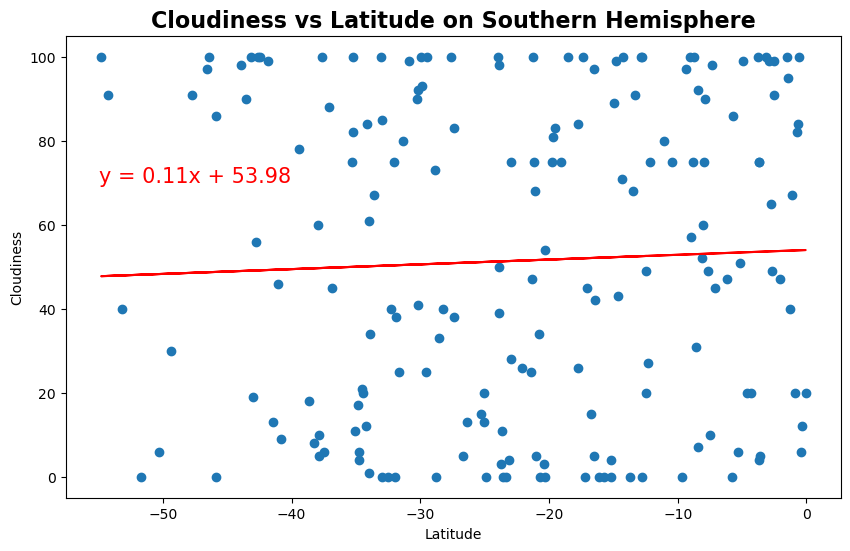

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Cloudiness vs Latitude on Southern Hemisphere", "Cloudiness",(-55,70))

**Discussion about the linear relationship:** Just like humidity, there is no correlation between cloudiness and latitude. The correlation coefficient for northern hemisphere is 0.00 and for the southern hemisphere is 0.04. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0664288521874186


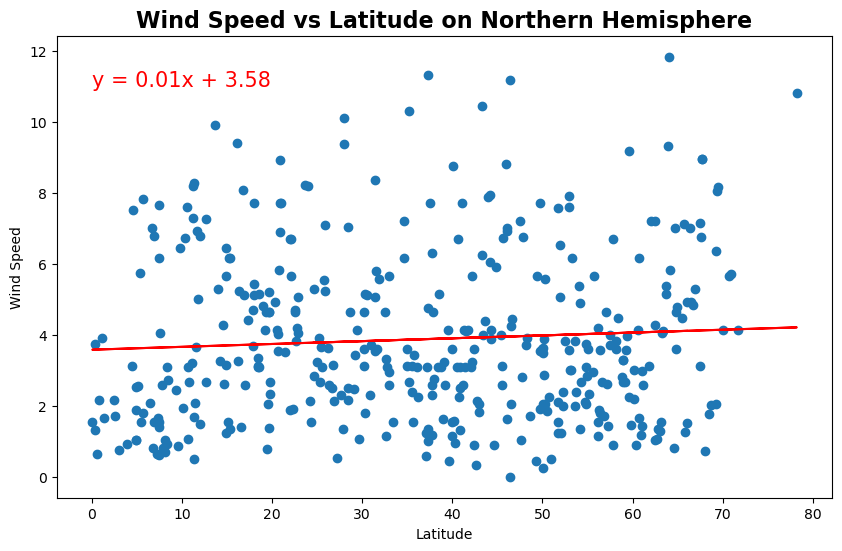

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "Wind Speed vs Latitude on Northern Hemisphere", "Wind Speed",(0,11))

The r-value is: -0.021192225305051358


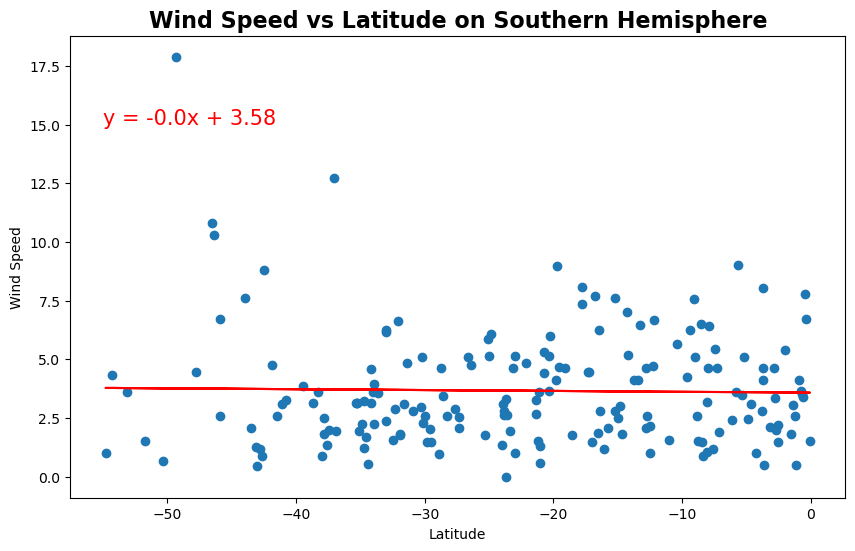

In [42]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "Wind Speed vs Latitude on Southern Hemisphere", "Wind Speed",(-55,15))

**Discussion about the linear relationship:** Wind speed data has also shown that there is no correlation with latitude. The correlation coefficient for northern hemisphere is 0.07 and for the southern hemisphere is -0.02. 